In [26]:
%autosave 0
%matplotlib notebook
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout)


Autosave disabled


# Inteligencia Artificial
# INFO257 - Unidad 3

Comunmente se reconocen 3 tipos de machine learning:
- Aprendizaje no supervisado (Unsupervised learning)
- Aprendizaje supervisado (Supervised learning) <--- Esta unidad
- Aprendizaje por refuerzo (Reinforcement learning)

# Aprendizaje Supervisado

Consiste en predecir una etiqueta $\mathcal{Y}$ a partir de observaciones $X$. Estas observaciones pueden ser cualquier caracteristica o fenomeno del mundo. Algunos ejemplos son: valores numericos, imagenes, letras, sonidos, series de tiempo, etc...

Para definirlo de manera formal, lo que intentamos hacer con Aprendizaje Supervisado (A.S.) es encontrar (estimar) una funcion: 

$$f_\theta : \mathcal{x} \mapsto \mathcal{y}$$

donde $\mathcal{x}$ es una observacion e $\mathcal{y}$ es la prediccion. La forma que tome $\mathcal{x}$ dependera de la naturaleza de los datos.
Normalmente se utiliza una representacion mas general donde $\mathcal{X}$ son todos nuestros datos y $\mathcal{x_i}$ es una observacion e $\mathbf{Y}$ son todas las etiquetas donde $\mathcal{y_i}$ es la etiqueta relacionada al dato $\mathcal{x_i}$. 

Esta funcion termina siendo un modelo de las observaciones.

En un esquema A.S. un dataset conteniendo N observaciones viene en la forma $[\{x_1,y_1\}, \{x_2,y_2\}, \dots, \{x_N,y_N\}]$

Se define a $\theta$ como el conjunto de parametros del modelo. Los parametros son aquellos que determinan un modelo en particular de la familia de modelos. Estos son los valores que se aprenden para que el modelo obtenga un buen rendimiento.

Por ejemplo si consideramos a $f_\theta$ como una recta $\mathcal{y} = mx+b$:

<IPython.core.display.Javascript object>


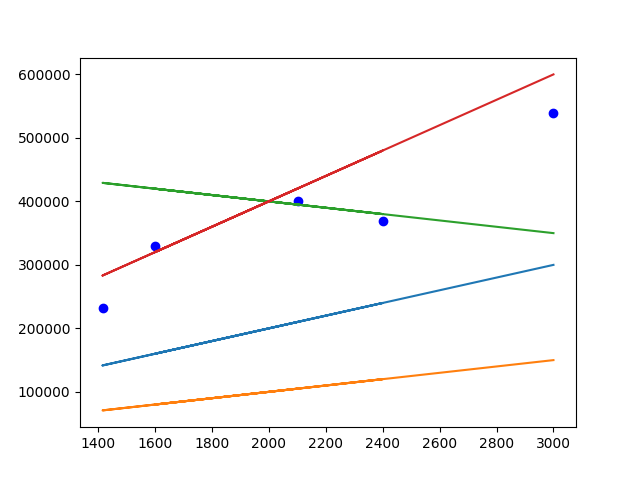

In [25]:
X = np.array([2104, 1600, 2400, 1416, 3000])
Y = [399900, 329900, 369000, 232000, 539900]
fig, ax = plt.subplots()
ax.plot(X,Y, 'bo')

ax.plot(X, 100*X+3)
ax.plot(X, 50*X+0)
ax.plot(X, -50*X+500000)
ax.plot(X, 200*X+10);

La variable $\mathcal{y}$ puede tomar 2 tipos de valores:
 - Continuo: Cuando es continuo se habla de un problema de regresion.
 - Categorico o Discreto: cuando es categorico se habla de un problema de clasificacion.

Finalmente, a los $\mathcal{x_i}$ se les conoce como atributos, caracteristicas, observaciones o features.

## Regresion Lineal

La regresion lineal es uno de los modelos mas simples de machine learning, pero no por eso menos capaz. 

Este modelo consiste en ajustar una funcion del tipo: 

$$y_i = f_\theta(\vec x_i) = \vec w^T \vec x_i + b = \sum_{j=1}^M w_j x_{ij} + b$$

donde $f_\theta$ es un modelo parametrico con $M+1$ parametros $\theta$.
La ecuacion de la recta es un caso especifico de la regresion lineal con $M=1$.

Podemos anotar los parametros como:

$$\theta= \begin{pmatrix} b \\ w_1 \\ w_2 \\ \vdots \\ w_M \end{pmatrix}$$

También podemos escribir el sistema matricialmente como:

    
$$ Y = X \theta$$

donde $Y= \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\y_N\end{pmatrix} \in \mathbb{R}^N$, $X = \begin{pmatrix} 1 & x_{11} & x_{12}& \ldots& x_{1M} \\ \vdots & \vdots & \vdots& \ddots& \vdots \\ 1 & x_{N1} & x_{N2}& \ldots& x_{NM} \\ \end{pmatrix} \in \mathbb{R}^{N\times M}$ y $\theta \in \mathbb{R}^M$


#### Pero como escogemos los mejores valores para $\theta$?

### Como aprenden las maquinas

Entrenar a una maquina o modelo para que aprenda se vuelve un problema de opytimizacion. Como en A.S. contamos con la etiqueta de los datos -> las respuestas correctas, necesitamos definir alguna funcion o metrica de error y un procedimiento para ajustar los parametros y disminuir el error.

La metrica de error se conoce como Loss function o funcion de perdida, y se donota como $\mathcal{L}(\theta)$ o $\mathcal{L}(x, \theta)$. 

Distintos modelos necesitan distintas funciones de perdida. Por ahora usaremos una de las mas conocidas para entrenar el regresor lineal, el Error Medio Cuadratico (o Mean Square Error, MSE).

el MSE de define como:

$$MSE = \frac{1}{2}\cdot(y - \hat y)^2$$

En nuestro caso en particular: 

$$MSE(\theta) = \frac{1}{2}\cdot(Y - \hat Y)^2 = \frac{1}{2}\cdot(Y - X\theta)^T(Y - X\theta) $$

El objetivo es minimizar $\mathcal{L}(\theta)$ ajustando $\theta$.

Si recordamos la materia de Calculo I, una de las formas de optimizar una funcion es derivandola e igualando a 0. 

Entonces el objetivo es:

$$min_\theta \mathcal{L} (\theta)$$

para eso:

$$\nabla_\theta \mathcal{L} (\theta) = \vec 0$$

$$\Rightarrow \nabla_\theta \frac{1}{2}\cdot(Y - X\theta)^T(Y - X\theta) = \vec 0$$

$$\Rightarrow \frac{1}{2}\cdot X^T(Y - X\theta) = \vec 0$$

despejando para $\theta$

$$\Rightarrow \theta = (X^T X)^{-1}Y$$

donde $(X^T X)^{-1}$ debe ser invertible. Afortunadamente es posible obtener un expresion analitica para la RL. Sin embargo, invertir una matriz tiene complejidad $\mathcal{O}(n^3)$, con n el numero de filas/columnas.

### Ejemplo Regresion Lineal en 1D

In [99]:
df = np.genfromtxt("admision.csv", delimiter=',')[1:, 1:]
df

array([[337.  , 118.  ,   4.  , ...,   9.65,   1.  ,   0.92],
       [324.  , 107.  ,   4.  , ...,   8.87,   1.  ,   0.76],
       [316.  , 104.  ,   3.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [330.  , 120.  ,   5.  , ...,   9.56,   1.  ,   0.93],
       [312.  , 103.  ,   4.  , ...,   8.43,   0.  ,   0.73],
       [327.  , 113.  ,   4.  , ...,   9.04,   0.  ,   0.84]])

(500, 1)


<IPython.core.display.Javascript object>


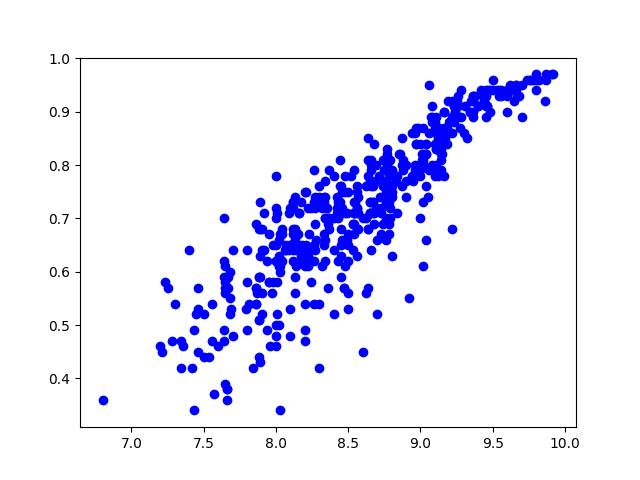

(500, 2)

In [100]:
X = np.array([df[:, 5]]).T
print(X.shape)
X_withones = np.hstack((np.ones((len(X),1)), X))
Y = df[:, -1]
fig, ax = plt.subplots()
ax.plot(X,Y, 'bo')
X_withones.shape

In [106]:
b_inicial = 0
w_inicial = 1
theta = np.array([[b_inicial],[w_inicial]])
theta

array([[0],
       [1]])

In [119]:
Y_hat = X_withones.dot(theta)


<IPython.core.display.Javascript object>


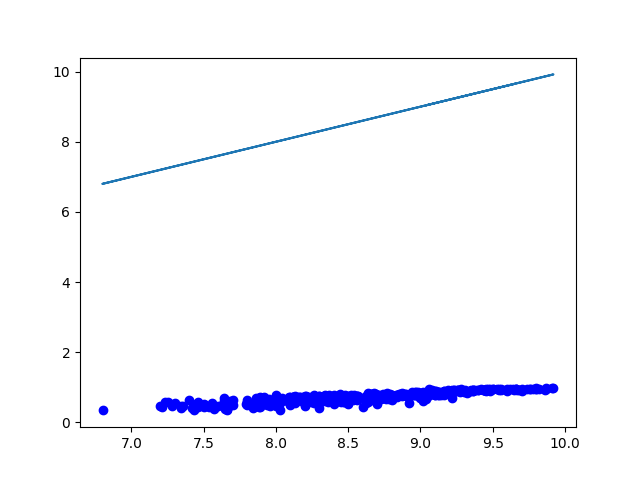

In [105]:
fig, ax = plt.subplots()
ax.plot(X,Y, 'bo')
ax.plot(X,Y_hat)

In [114]:
theta_hat = np.linalg.inv(X_withones.T.dot(X_withones)).dot(X_withones.T).dot(Y)

In [115]:
theta_hat

array([-1.04433492,  0.20592168])

In [118]:
Y_hat = X_withones.dot(theta_hat)

<IPython.core.display.Javascript object>


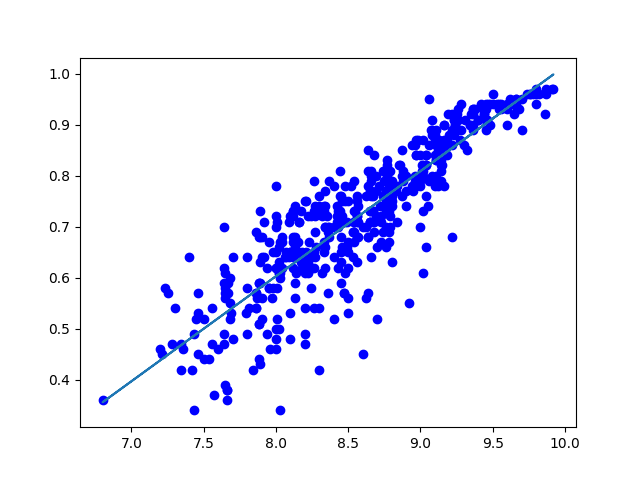

In [117]:
fig, ax = plt.subplots()
ax.plot(X,Y, 'bo')
ax.plot(X,Y_hat)

### Ejemplo Regresion Lineal en 2D

In [122]:
df = np.genfromtxt("admision.csv", delimiter=',')[1:, 1:]
df

array([[337.  , 118.  ,   4.  , ...,   9.65,   1.  ,   0.92],
       [324.  , 107.  ,   4.  , ...,   8.87,   1.  ,   0.76],
       [316.  , 104.  ,   3.  , ...,   8.  ,   1.  ,   0.72],
       ...,
       [330.  , 120.  ,   5.  , ...,   9.56,   1.  ,   0.93],
       [312.  , 103.  ,   4.  , ...,   8.43,   0.  ,   0.73],
       [327.  , 113.  ,   4.  , ...,   9.04,   0.  ,   0.84]])

(500, 2)


<IPython.core.display.Javascript object>


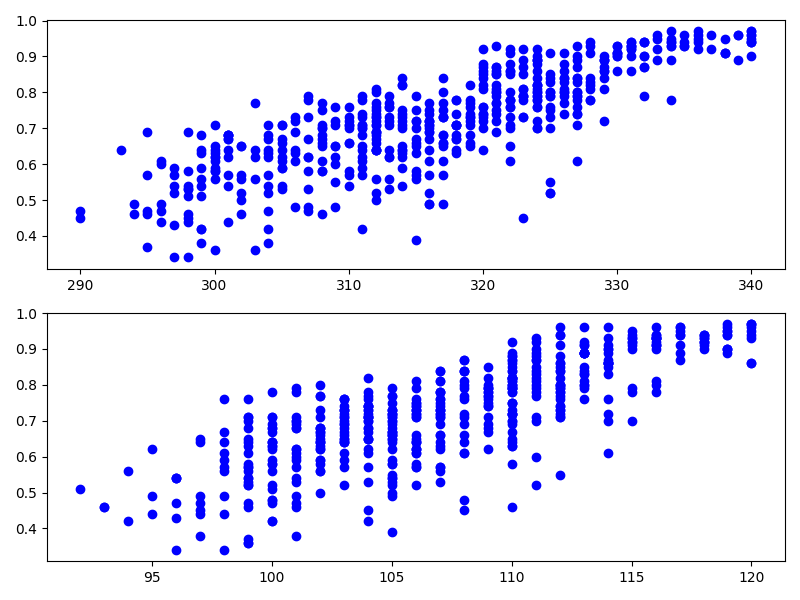

array([[  1., 337., 118.],
       [  1., 324., 107.],
       [  1., 316., 104.]])

In [175]:
X = np.array(df[:, 0:2])
print(X.shape)
X_withones = np.hstack((np.ones((len(X),1)), X))
Y = df[:, -1]
fig, ax = plt.subplots(2, figsize=(8,6), tight_layout=True)
ax[0].plot(X[:,0],Y, 'bo')
ax[1].plot(X[:,1],Y, 'bo')
X_withones[:3]

<IPython.core.display.Javascript object>


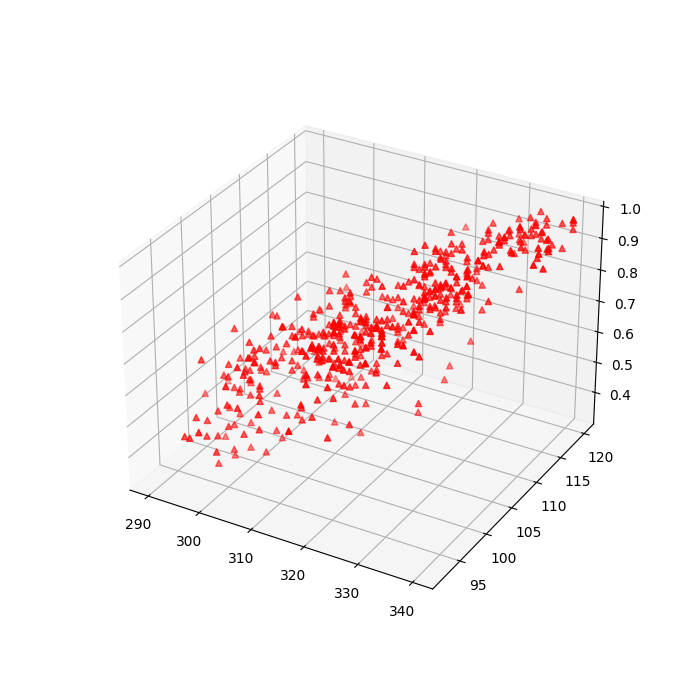

In [191]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], Y, c='r', marker='^')


In [176]:
b_inicial = 0
w1_inicial = 1
w2_inicial = 1
theta = np.array([[b_inicial],[w1_inicial],[w2_inicial]])
theta

array([[0],
       [1],
       [1]])

In [177]:
X[:,0].shape

(500,)

In [178]:
X[:,1].shape

(500,)

In [195]:
X_withones.dot(theta).shape

(500, 1)

<IPython.core.display.Javascript object>


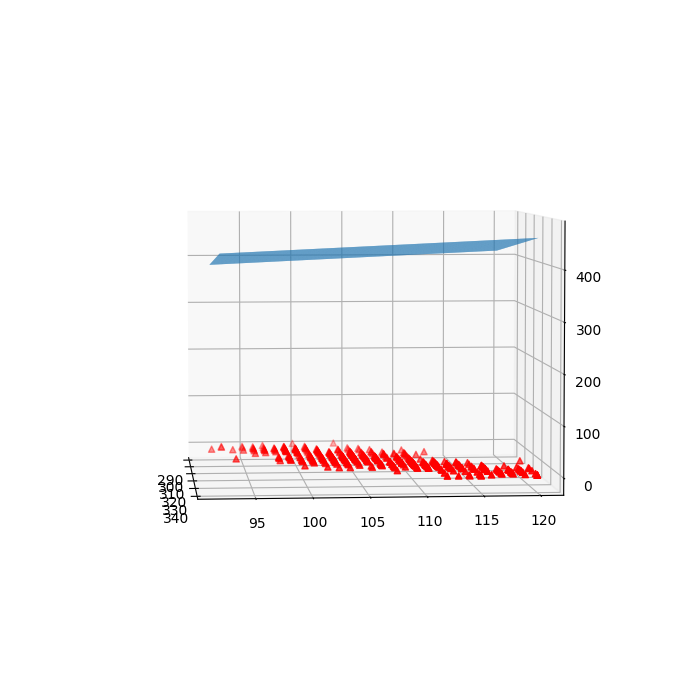

In [200]:
ejex = np.linspace(X.min(), X.max(), len(Y))
Y_hat = X_withones.dot(theta)
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

x_g, y_g = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), len(X[:,0])), np.linspace(X[:,1].min(), X[:,1].max(), len(X[:,1])))
Z = x_g*w1_inicial + y_g*w2_inicial + b
ax.plot_surface(x_g, y_g, Z)
ax.scatter(X[:,0], X[:,1], Y, c='r', marker='^')



In [196]:
theta_hat = np.linalg.inv(X_withones.T.dot(X_withones)).dot(X_withones.T).dot(Y)

In [197]:
Y_hat = X_withones.dot(theta_hat)

<IPython.core.display.Javascript object>


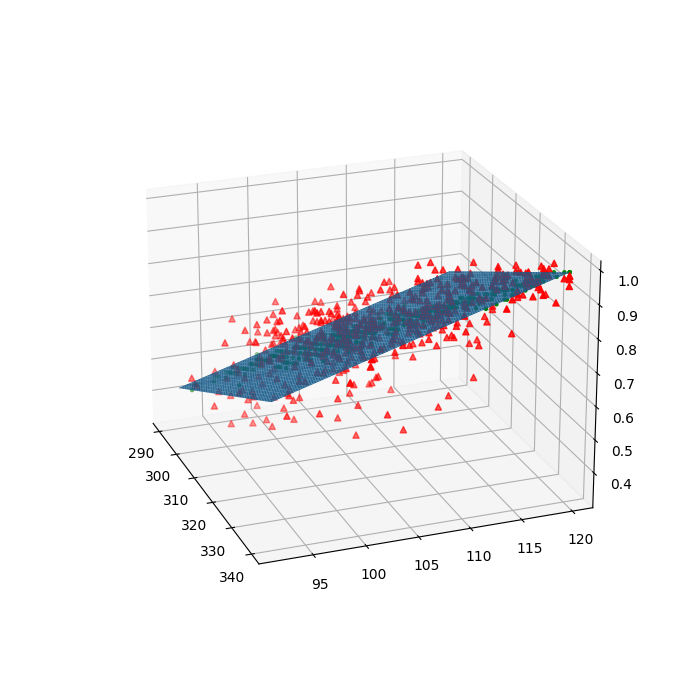

In [204]:
Y_hat = X_withones.dot(theta_hat)
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

x_g, y_g = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), len(X[:,0])), np.linspace(X[:,1].min(), X[:,1].max(), len(X[:,1])))
Z = x_g*theta_hat[1] + y_g*theta_hat[2] + theta_hat[0]
ax.plot_surface(x_g, y_g, Z)

ax.scatter(X[:,0], X[:,1], Y, c='r', marker='^')
ax.scatter(X[:,0], X[:,1], Y_hat, c='g', marker='.')


## Extension a funciones base

Una de las propiedades mas poderosas del Regresor Lineal es que no necesariamente se deben modelar los datos como  rectas (o hiperplanos en su generalizacion), puede ser cualquier funcion arbitraria. Lo importantes (y por ende el nombre) es que sea lineal en sus parametros.

De esta forma, el regresor lineal podria ser anotado como:

$$y_i = f_\theta(\vec x_i) = \vec w^T \vec \Phi_i + b = \sum_{j=1}^M w_j \Phi_{ij} + b$$

$\Phi = \begin{pmatrix} 1 & f_{1}(x_{11}) & f_{2}(x_{12})& \ldots& f_{M}(x_{1M}) \\ \vdots & \vdots & \vdots& \ddots& \vdots \\ 1 & f_{1}(x_{N1}) & f_{2}(x_{N2})& \ldots& f_{M}(x_{NM}) \\ \end{pmatrix}$

Un posible ejemplo es utilizar funciones polinomiales, de tal forma que:

$\Phi = \begin{pmatrix} 1 & x_{11} & x_{12}^2& \ldots& x_{1M}^M \\ \vdots & \vdots & \vdots& \ddots& \vdots \\ 1 & x_{N1} & x_{N2}^2& \ldots& x_{NM}^M \\ \end{pmatrix}$


Por ejemplo, consideremos el siguiente ejemplo

In [212]:
poly_basis = lambda x, M : np.vstack([x**k for k in range(M)]).T
theta_real = np.array([10, -2, -0.3, 0.1])

x = np.linspace(-5, 6, num=21); 
X = poly_basis(x, len(theta_real))
y = np.dot(X, theta_real)

rseed, sigma = 0, 1.
np.random.seed(rseed);
Y = y + sigma*np.random.randn(len(x))
P = np.random.permutation(len(x))
train_idx, valid_idx = P[:2*len(x)//3], P[2*len(x)//3:]

<IPython.core.display.Javascript object>


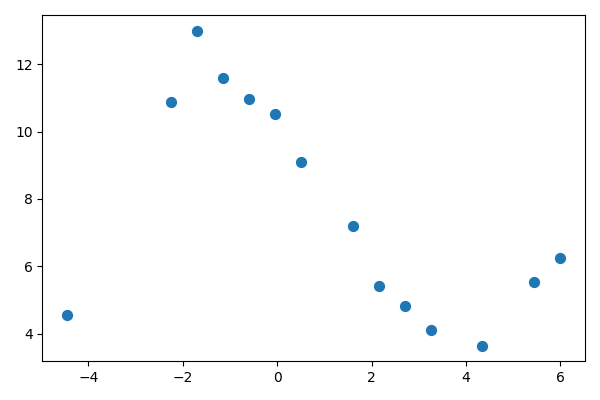

In [216]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
#ax.plot(x, y, 'g-', linewidth=2, label='Modelo real', alpha=0.6, zorder=-100)
ax.scatter(x[train_idx], Y[train_idx], s=50, label='Entrenamiento')

<IPython.core.display.Javascript object>


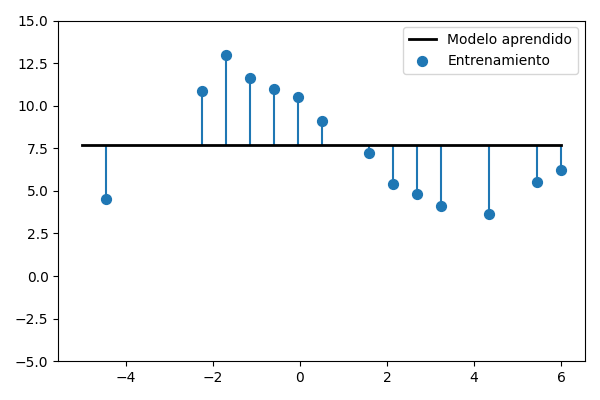

interactive(children=(IntSlider(value=1, description='M: grado del polinomio', layout=Layout(height='20px', wi…

In [219]:
plt.close('all'); fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)

def update_plot(ax, M):
    ax.cla();
    Phi = poly_basis(x, M)
    theta_hat = np.linalg.lstsq(Phi[train_idx, :], Y[train_idx], rcond=None)[0]
    #ax.plot(x, y, 'g-', linewidth=2, label='Modelo real', alpha=0.6, zorder=-100)
    ax.scatter(x[train_idx], Y[train_idx], s=50, label='Entrenamiento')
    #ax.scatter(x[valid_idx], Y[valid_idx], s=50, label='Validación')
    ax.vlines(x[train_idx], np.dot(Phi[train_idx, :], theta_hat), Y[train_idx])  
    #ax.vlines(x[valid_idx], np.dot(Phi[valid_idx, :], theta_hat), Y[valid_idx])     
    x_plot = np.linspace(-5, 6, num=100);
    ax.plot(x_plot, np.dot(poly_basis(x_plot, M), theta_hat), 'k-', linewidth=2, label='Modelo aprendido')
    ax.set_ylim([-5, 15]); plt.legend()
    
widgets.interact(update_plot, 
                 ax=widgets.fixed(ax), 
                 M=IntSlider_nice(description='M: grado del polinomio', min=1, max=11));